In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def H(ang: float, dx: int, dy: int) -> np.array:
    return np.array([
        [np.cos(ang), -np.sin(ang), dx],
        [np.sin(ang), np.cos(ang), dy],
        [0, 0, 1],
    ])

<h2>
    <p style="color:black;text-align:center;"> 
        Forward kinematic <br>
        Initial conditions
    </p> 
</h2>

In [3]:
a = 0 # servo one rotation
b = 0 # servo two rotation
L = np.array([-2, -1]) # distance between servo
la =  2 # 1 link
lb =  3 # 2 link
lc =  5 # 3 link
O = np.array([0, 0]) # start point

In [4]:
H1 = H(5*np.pi/4 + b, *L)
H2 = H(3*np.pi/4 - a - b, lb, 0)
H3 = H(0, lc, 0)

H12 = np.matmul(H1, H2)
H123 = np.matmul(H12, H3)

<h2>
    <p style="color:black;margin:0;padding:0;"> 
        Draw Solution
    </p> 
</h2>

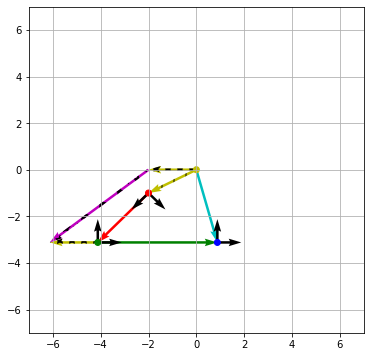

In [5]:
plt.figure(figsize=(6, 6))

plt.quiver(*O, *H123[:2, 2], color='c', scale_units='xy', angles='xy', scale=1) # FK solution

# Creating plot
plt.quiver(*O, *L, color='y', hatch='|', scale_units='xy', angles='xy', scale=1) # servo vector


plt.quiver(*O, *(-la * H12[:2,0]), color='y', hatch='*', scale_units='xy', angles='xy', scale=1) # 1 link
plt.quiver(*H12[:2, 2], *(-la * H12[:2,0]), color='y', hatch='*', scale_units='xy', angles='xy', scale=1) # 1' link
plt.quiver(*(-la * H12[:2,0]), *H12[:2, 2], color='m', hatch='*', scale_units='xy', angles='xy', scale=1) # link between 1 and 1'
plt.quiver(*L, *(lb * H1[:2,0]), color='r', scale_units='xy', angles='xy', scale=1) # 2 link
plt.quiver(*H12[:2, 2], *(lc * H12[:2,0]), color='g', scale_units='xy', angles='xy', scale=1) # 3 link


plt.quiver(*np.array([L, L]).T, *H1[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # base frame
plt.quiver(*np.array([H12[:2, 2], H12[:2, 2]]).T, *H12[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # second frame
plt.quiver(*np.array([H123[:2, 2], H123[:2, 2]]).T, *H123[:2, :2], color='k', scale_units='xy', scale=1) # third frame

plt.scatter(*np.array([O, L, H12[:2, 2], H123[:2, 2]]).T, c=['y', 'r', 'g', 'b'])

# x-lim and y-lim
lim = [-7, 7]
plt.xlim(*lim) 
plt.ylim(*lim)
plt.grid() # grid on the plot

<h2>
    <p style="color:black;margin:0;padding:0;"> 
        Solution with variable initial conditions
    </p> 
</h2>

In [6]:
from ipywidgets import FloatSlider, interact

In [7]:
def solution(a, b, la, lb, lc):
    plt.figure(figsize=(6, 6))

    # x-lim and y-lim
    lim = [-2, 2]
    plt.xlim(*lim) 
    plt.ylim(*lim)
    plt.grid() # grid on the plot

    L = np.array([-.2, -.22]) # distance between servo
    O = np.array([0, 0]) # start point

    H1 = H(5*np.pi/4 + b, *L)
    H2 = H(3*np.pi/4 - a - b, lb, 0)
    H3 = H(0, lc, 0)

    H12 = np.matmul(H1, H2)
    H123 = np.matmul(H12, H3)


    # Draw solution
    plt.quiver(*O, *H123[:2, 2], color='c', scale_units='xy', angles='xy', scale=1) # FK solution
    
    
    plt.quiver(*O, *L, color='y', hatch='|', scale_units='xy', angles='xy', scale=1) # servo vector


    plt.quiver(*O, *(-la * H12[:2,0]), color='y', hatch='*', scale_units='xy', angles='xy', scale=1) # 1 link
    plt.quiver(*H12[:2, 2], *(-la * H12[:2,0]), color='y', hatch='*', scale_units='xy', angles='xy', scale=1) # 1' link
    plt.quiver(*(-la * H12[:2,0]), *H12[:2, 2], color='m', hatch='*', scale_units='xy', angles='xy', scale=1) # link between 1 and 1'
    plt.quiver(*L, *(lb * H1[:2,0]), color='r', scale_units='xy', angles='xy', scale=1) # 2 link
    plt.quiver(*H12[:2, 2], *(lc * H12[:2,0]), color='g', scale_units='xy', angles='xy', scale=1) # 3 link

    scale_frame = 2
    plt.quiver(*np.array([L, L]).T, *H1[:2, :2], color='k', scale_units='xy', angles='xy', scale=scale_frame) # base frame
    plt.quiver(*np.array([H12[:2, 2], H12[:2, 2]]).T, *H12[:2, :2], color='k', scale_units='xy', angles='xy', scale=scale_frame) # second frame
    plt.quiver(*np.array([H123[:2, 2], H123[:2, 2]]).T, *H123[:2, :2], color='k', scale_units='xy', scale=scale_frame) # third frame

    plt.scatter(*np.array([O, L, H12[:2, 2], H123[:2, 2]]).T, c=['y', 'r', 'g', 'b'])
    
    print(H123[:2, 2])



In [8]:
interact(
    solution, 
    a=FloatSlider(min=-np.pi, max=np.pi, step=.2, value=0),
    b=FloatSlider(min=-np.pi, max=np.pi, step=.2, value=0),
    la=FloatSlider(min=0, max=.05, step=.01, value=.024),
    lb=FloatSlider(min=.1, max=2, step=.1, value=1),
    lc=FloatSlider(min=.1, max=2, step=.1, value=1.2)
)

interactive(children=(FloatSlider(value=0.0, description='a', max=3.141592653589793, min=-3.141592653589793, s…

<function __main__.solution(a, b, la, lb, lc)>

<h2>
    <p style="color:black;text-align:center;"> 
        Inverse kinematic <br>
        Initial conditions
    </p> 
</h2>

In [9]:
L = np.array([-2, -1]) # distance between servo
la = 2 # 1 link
lb = 3 # 2 link
lc = 5 # 3 link

x =  0.71074443 
y = -4.54912583

In [10]:
delta = ((x - L[0])**2 + (y - L[1])**2)**0.5
gama = np.math.acos((x - L[0]) / delta) # np.abs(np.math.atan((y - L[1]) / (x - L[0])))
teta = np.math.acos( (lb**2 - lc**2 + delta**2) / (2*lb*delta) )
ksi = np.math.acos( (lb**2 + lc**2 - delta**2) / (2*lb*lc) )
beta = 3*np.pi/4 - teta - gama
alpha = ksi + teta + gama - np.pi

C:\Users\maste\AppData\Local\Temp/ipykernel_19472/4051166394.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  gama = np.math.acos((x - L[0]) / delta) # np.abs(np.math.atan((y - L[1]) / (x - L[0])))
C:\Users\maste\AppData\Local\Temp/ipykernel_19472/4051166394.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  teta = np.math.acos( (lb**2 - lc**2 + delta**2) / (2*lb*delta) )
C:\Users\maste\AppData\Local\Temp/ipykernel_19472/4051166394.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ksi = np.math.acos( (lb**2 + lc**2 - delta**2) / (2*lb*lc) )


[ 0.71074443 -4.54912583]


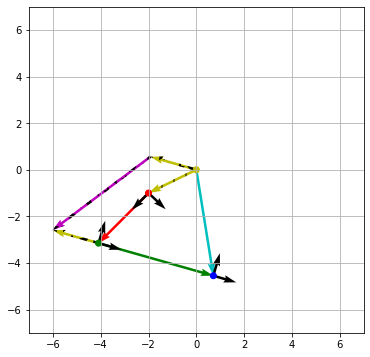

In [11]:
solution(alpha, beta, la, lb, lc)